# Computer Vision - Input/Output + Basic operations

In this first practical session, you will use the `opencv` library to handle input and output and some operations that can be applied to an image, such as taking a photo of yourself and display it in another colorspace.

In [47]:
%matplotlib inline

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageOps, ImageEnhance, Image
from ipywidgets import interact
import os

plt.rcParams['figure.figsize'] = [12, 8]

#### Step 1:  take a photo with your webcam
We create an object to access the webcam and we take a photo.  
What is the format use to represent the red, blue and green channels by `opencv`.

In [26]:
# Create the object to use the webcam
gst_str = "nvarguscamerasrc ! video/x-raw(memory:NVMM)," \
            "width=(int)1280, height=(int)720, format=(string)NV12, " \
            "framerate=(fraction)25/1 ! nvvidconv ! video/x-raw, " \
            "width=(int)1280, height=(int)720, format=(string)BGRx ! " \
            "videoconvert ! video/x-raw, format=(string)BGR !" \
            "appsink"
vid = cv2.VideoCapture(gst_str, cv2.CAP_GSTREAMER)

# Read a frame from your webcam
rlt_frame, frame = vid.read()

# Close the webcam
vid.release()

cv2.imshow('frame', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the photo
cv2.imwrite("/home/nvidia/Documents/elen0016-computer-vision-tutorial/notebooks/tutorial1/test.jpg", frame)

True

Do we need to change it to display the image with `matplotlib`?

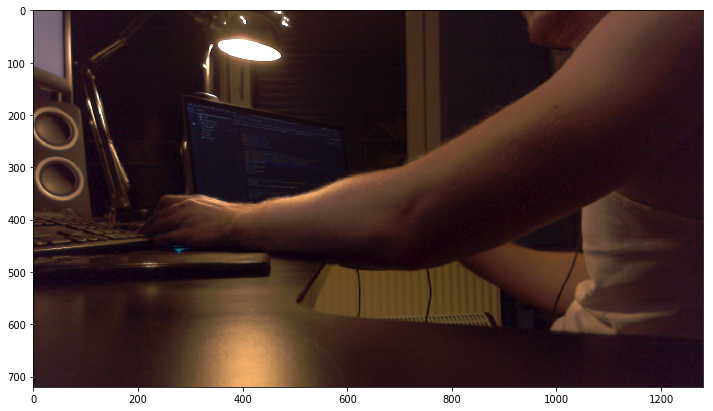

In [27]:
# Convertion from BGR to RGB
rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Display the photo
plt.imshow(rgb_frame)
plt.show()

You can continuously read from the webcam to create a video stream.

In [28]:
gst_str = "nvarguscamerasrc ! video/x-raw(memory:NVMM)," \
            "width=(int)1280, height=(int)720, format=(string)NV12, " \
            "framerate=(fraction)25/1 ! nvvidconv ! video/x-raw, " \
            "width=(int)1280, height=(int)720, format=(string)BGRx ! " \
            "videoconvert ! video/x-raw, format=(string)BGR !" \
            "appsink"
vid = cv2.VideoCapture(gst_str, cv2.CAP_GSTREAMER)

win_name = 'Camera Preview'
cv2.namedWindow(win_name, cv2.WINDOW_NORMAL)

while cv2.waitKey(1) != 27: # Escape
    has_frame, frame = vid.read()
    if not has_frame:
        break
    cv2.imshow(win_name, frame)

cv2.destroyAllWindows()

#### Step 2: change of colorspace
Convertion of the photo in another colorspace, for example the HSV one or grayscale one.

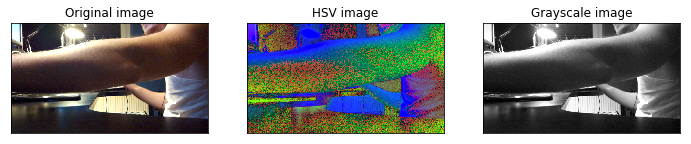

In [29]:
# Change of colorspace
rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Display the result
plt.subplot(1, 3, 1).set_title('Original image')
plt.imshow(rgb_frame)
plt.xticks([]);plt.yticks([])
plt.subplot(1, 3, 2).set_title('HSV image')
plt.imshow(hsv_frame)
plt.xticks([]);plt.yticks([])
plt.subplot(1, 3, 3).set_title('Grayscale image')
plt.imshow(gray_frame, cmap='gray')
plt.xticks([]);plt.yticks([])
plt.show()

#### Step 3: apply some transformations on the image
We can also change the properties of an image, such as its contrast, brightness, saturation, ...  
The library `PIL` is well suited for those operations. Can you apply those transformations on an `opencv` object (array)? What kind of object do you have to use?

In [30]:
# Convert the RGB image to a PIL object
pil_image=Image.fromarray(rgb_frame)

# Change the contrast of the image
def contrast(factor):
    enhancer = ImageEnhance.Contrast(pil_image)
    im_output = enhancer.enhance(factor)
    plt.imshow(im_output)

In [31]:
interact(contrast, factor=(0., 2.))

interactive(children=(FloatSlider(value=1.0, description='factor', max=2.0), Output()), _dom_classes=('widget-…

<function __main__.contrast(factor)>

#### Step 6: segmentation of a color
Segmentation is an useful tool in computer vision. It can be used to extract pixels of the same color.

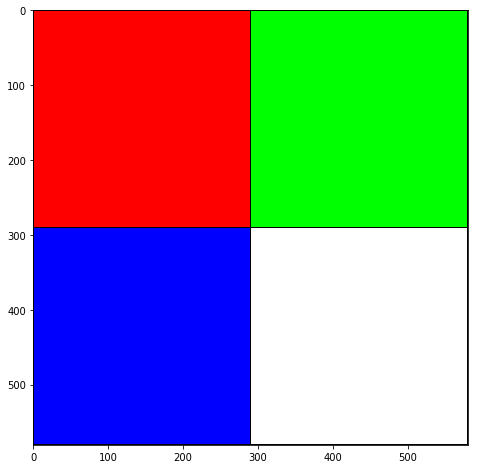

In [49]:
# Load the image
squares = cv2.imread('squares.png')

# Convert from BGR to RGB
rgb_squares = cv2.cvtColor(squares, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(rgb_squares)
plt.show()

[[  0   0   0 ...,   0   0   0]
 [  0 255 255 ...,   0   0   0]
 [  0 255 255 ...,   0   0   0]
 ..., 
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]]


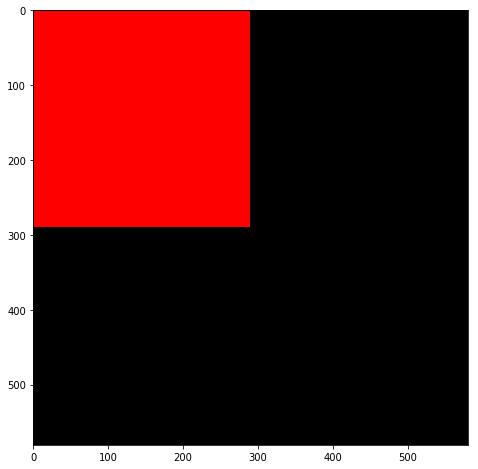

In [50]:
# Define the color code /!\ BGR format
v_min = 127
v_max = 255
s_min = 127
s_max = 255
lower = np.array([0, s_min, v_min])
upper = np.array([30, s_max, v_max])
lower2 = np.array([150, s_min, v_min])
upper2 = np.array([179, s_max, v_max])

# Threshold the image to get only red color
img_hsv = cv2.cvtColor(squares, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(img_hsv, lower, upper)
mask2 = cv2.inRange(img_hsv, lower2, upper2)
mask3 = cv2.bitwise_or(mask, mask2)
print(mask3)

# Apply a `and` mask to keep only red pixels
res = cv2.bitwise_and(squares, squares, mask=mask3)

# Display the result
rgb = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()

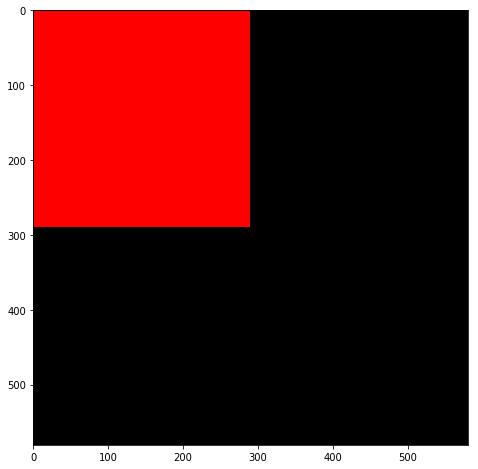

In [51]:
# Define the color code /!\ BGR format
black = np.array([0, 0, 0])
blue = np.array([255, 0, 0])
green = np.array([0, 255, 0])
red = np.array([0, 0, 255])
white = np.array([255, 255, 255])

# Threshold the image to get only red color
mask = cv2.inRange(squares, black, red)

# Apply a and mask to keep only red pixels
res = cv2.bitwise_and(squares, squares, mask=mask)

# Display the result
rgb = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()